<a href="https://colab.research.google.com/github/t053600520/SEMAFORIZACION-INTELIGENTE/blob/main/Practica_Redes_Neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Camargo Lopez, Cesar Ivan

2. Cueva Blas, Eduar

3. Magan Armas, Cesar Ailton Joaquin



Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [1]:
!pip install -q kaggle
!pip install -q scikeras

In [5]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maganarmas","key":"f9f88d38d7883272d44a40aa032a242b"}'}

# Descargar la base de datos

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign3.png          
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: american_sign_language.PNG  
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     
replace sign_mnist_test/sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test/sign_mnist_test.csv  
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    
replace sign_mnist_train/sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error

# Lectura de datos

In [8]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [9]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [10]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


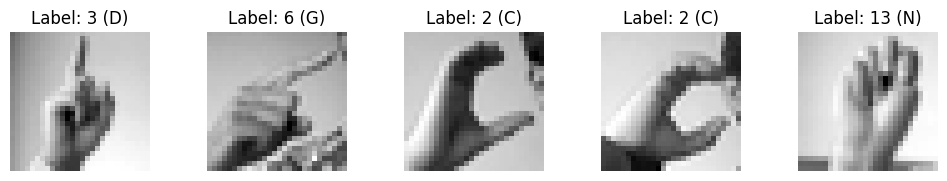

In [12]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [14]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?
- Es una técnica usada en el entrenamiento de redes neuronales para ampliar el tamaño y la variedad del conjunto de datos sin la necesidad de recolectar más muestras.

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
- Porque beneficia acelerando el proceso, además de mejorar la estabilidad.
```



# Creación del modelo

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
- Conv2D extrae características locales mediante filtros; mientras que MaxPooling2D reduce la resolución, ayudando a evitar el sobreajuste y haciendo el modelo más invariante a traslaciones.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
El Dropout apaga neuronas aleatoriamente en cada iteración de entrenamiento, previniendo que el modelo dependa de combinaciones específicas y ayudando a reducir el sobreajuste.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
- ReLU permite el flujo de gradientes significativos para valores positivos, acelerando el entrenamiento y evitando gradientes atenuados.

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
- Softmax convierte las salidas en probabilidades para clasificaciones multicase, ayudando al modelo a decidir la clase más probable.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
- Es el área que cubre el filtro. Los filtros pequeños capturan más detalles, mientras que filtros grandes capturan patrones más amplios.

6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
- Reduce la resolución de la salida, simplificando la representación pero con posible pérdida de detalles.

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
- Filtros pequeños y strides bajos (3x3, stride 1) extraen detalles finos, filtros grandes y strides altos reducen la complejidad pero sacrifican precisión. El mejor enfoque suele ser realizar experimentos con diferentes configuraciones para encontrar el equilibrio adecuado.

```



# Terminación anticipada y Checkpoints

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [17]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
- Es una técnica que detiene el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar después de cierto número de época. Esto evita que el modelo continúe entrenándose y se sobreajuste, ahorrando tiempo y mejorando la capacidad de generalización.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
- Guarda el modelo en puntos específicos durante el entrenamiento, típicamente cuando alcanza su mejor rendimiento en el conjunto de validación. Esto asegura tener una versión óptima del modelo, útil para restaurarlo si el rendimiento empeora en épocas posteriores.
```



# Entrenamiento

In [18]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1000 - loss: 2.9695 Modelo guardado época 1 con exactitud: 0.4636
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.1011 - loss: 2.9651 - val_accuracy: 0.4636 - val_loss: 1.5463
Epoch 2/5
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4615 - loss: 1.5957 Modelo guardado época 2 con exactitud: 0.6938
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.4619 - loss: 1.5942 - val_accuracy: 0.6938 - val_loss: 0.8519
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6183 - loss: 1.0911 Modelo guardado época 3 con exactitud: 0.7886
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6183 - loss: 1.0910 - val_accuracy: 0.7886 - val_loss: 0.5864
Epoch 4/5
852/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6966 - loss: 0.8555 Modelo guardado época 4 con exactitud: 0.8394
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6967 - loss: 0.8552 - val_accuracy: 0.8394 - val_loss: 0.4511
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
- Epochs define el número de veces que el modelo pasará por el conjunto completo de datos de entrenamiento. Un mayor número de epochs permite que el modelo aprenda más, pero entrenar por demasiadas épocas puede llevar al sobreajuste.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
- train_generator genera lotes de datos de entrenamiento para actualizar los pesos del modelo, mientras que val_generator genera datos de validación para evaluar el rendimiento del modelo sin actualizar los pesos.
```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


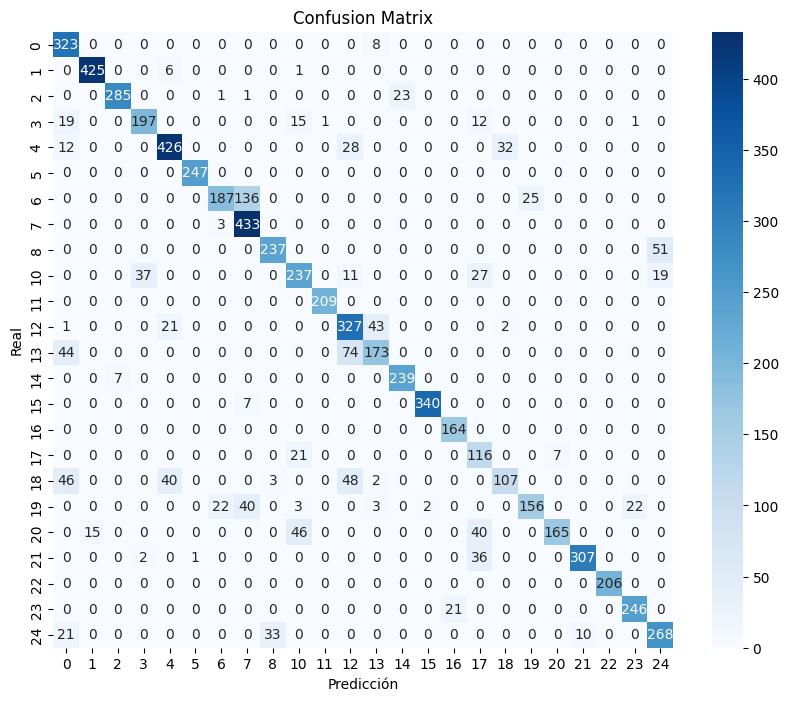

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       331
           1       0.97      0.98      0.97       432
          10       0.98      0.92      0.95       310
          11       0.83      0.80      0.82       245
          12       0.86      0.86      0.86       498
          13       1.00      1.00      1.00       247
          14       0.88      0.54      0.67       348
          15       0.70      0.99      0.82       436
          16       0.87      0.82      0.84       288
          17       0.73      0.72      0.72       331
          18       1.00      1.00      1.00       209
          19       0.67      0.83      0.74       394
           2       0.76      0.59      0.67       291
          20       0.91      0.97      0.94       246
          21       0.99      0.98      0.99       347
          22       0.89      1.00      0.94       164
          23       0.50      0.81      0.62       144
          24       0.76    

In [19]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

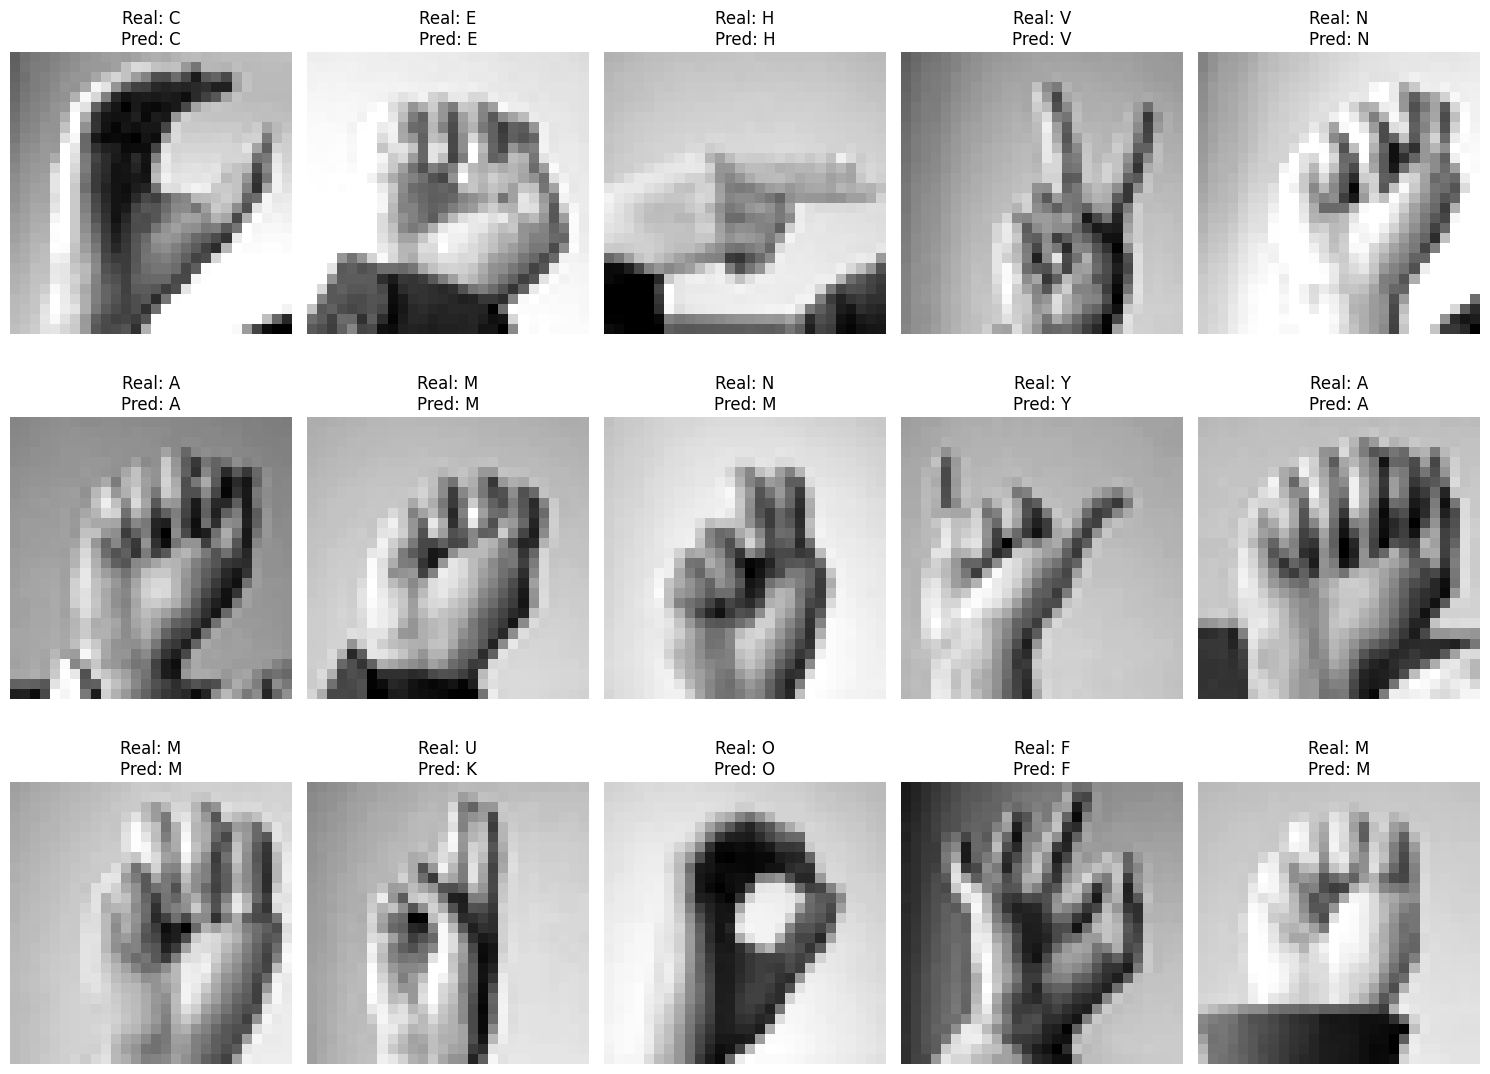

In [20]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
- Muestra la cantidad de predicciones correctas e incorrectas clasificadas por clase. Además, proporciona información sobre los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, ayudando a analizar el rendimiento del modelo en cada clase.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
- Incluye métricas de rendimiento como precisión, recall, F1-score y soporte (númerode muestras por clase). Facilita el análisis detallado de la capacidad del modelo para identificar cada clase correctamente.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
- Porque representan el conjunto de prueba, que evalúa el modelo con datos nuevos, no vistos en el entrenamiento. Esto permite medir la capacidad de generalización del modelo.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
- Selecciona el índice de la predicción con la mayor probabilidad, lo cual se traduce en la clase predicha por el modelo en problemas de clasificación.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
- Un heatmap de la matriz de confusión destaca visualmente las frecuencias de predicciones correctas e incorrectas, ayudando a identificar patrones o errores sistemáticos en las predicciones.

```



# Refinamiento

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [22]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8867614554971128 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [23]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8301728945900725




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
- Es una técnica de búsqueda de hiperparámetros que prueba combinaciones de parámetros para encontrar la mejor configuración que optimice el rendimiento del modelo. Se evalúan múltiples combinaciones mediante validación cruzada, permitiendo elegir los mejores hiperparámetros.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
- param_grid define el conjunto de valores de hiperparámetros que se probarán en GridSearchCV. Ajustar parámetros como el optimizador y la tasa de dropout es esencial, ya que el optimizador afecta la forma en que el modelo aprende y dropout controla el sobreajuste, ambos impactando directamente la precisión y generalización.


3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
- El parámetro cv=3 en GridSearchCV indica que se usa una validación cruzada de 3 particiones. Esto significa que el conjunto de entrenamiento se divide en 3 subconjuntos, y el modelo se entrena y valida 3 veces (cambiando el subconjunto de validación en cada iteración). Mejora la evaluación del modelo al promediar resultados de múltiples divisiones del conjunto de datos.
```



# Temas grupales

1. Arquitectura de Redes Neuronales Convolucionales
2. Funciones de Activación en CNN
3. Técnicas de Preprocesamiento de Imágenes
4. Entrenamiento y Optimización de Modelos
5. Regularización en CNN
6. Evaluación de Modelos CNN
7. Aplicaciones de Redes Neuronales Convolucionales

Ejemplo:



```
Arquitectura de Redes Neuronales Convolucionales
(Autor/es): [Nombres de los estudiantes del grupo]
Contenido:
Este tema abarca la estructura fundamental de las redes neuronales convolucionales, que incluye las siguientes capas:

Capas Convolucionales: Estas capas son responsables de extraer características relevantes de las imágenes mediante la aplicación de filtros (kernels) que realizan operaciones de convolución.

Capas de Pooling: Se utilizan para reducir la dimensionalidad de las características extraídas, manteniendo las más importantes. Las capas de pooling ayudan a hacer que el modelo sea menos sensible a pequeñas variaciones en las imágenes.

Capas Totalmente Conectadas: Estas capas se encuentran al final de la red y son responsables de la clasificación final de las características extraídas. Conectan todas las neuronas de la capa anterior a cada neurona de la capa siguiente.

<img_url>: [URL de una imagen de arquitectura de CNN]

Referencias: [Referencia bibliográfica o enlace a un recurso]
```

